In [31]:
import numpy as np
import sys

#行列Aを生成
def prepare_matrix(n):
  matrix=np.zeros((n,n))
  for i in range(n-1,-1,-1):
    if i==n-1:
      matrix[i][i]=-1
    else:
      matrix[i][i]=-2
      matrix[i][i+1]=1
      matrix[i+1][i]=1
      
  return matrix


# 逆行列を計算
def calc_inverse_matrix(n,A):
  B=np.eye(n)
  for j in range(0,n,1):
    for i in range(j+1,n,1):
      coe = -A[i][j]/A[j][j]
      for k in range(n):
        A[i][k]+=coe*A[j][k]
        B[i][k]+=coe*B[j][k]

  for j_2 in range(n-1,0,-1):
    for i_2 in range(j_2-1,-1,-1):
      coe_2 = -A[i_2][j_2]/A[j_2][j_2]
      for k_2 in range(n):
        B[i_2][k_2]+=coe_2*B[j_2][k_2]

  for i_3 in range(n):
    for j_3 in range(n):
      B[i_3][j_3]=B[i_3][j_3]/A[i_3][i_3]
      
  return B


In [37]:
import matplotlib.pyplot as plt
import math
import utils
#n番目の固有値と固有ベクトルを求める
def n_th_eigen_value(n,A,y_0,pre_eigen_vectors,is_inv):
  y=y_0
  diff=1
  times=0
  err=10**-10
  while abs(diff) > err:
    times+=1
    internal_y=utils.matvec(n,A,y)
    in_for_y=internal_y
    for eigen_vec in pre_eigen_vectors:
      inner_pro_base=utils.inner_product(n,eigen_vec,internal_y)
      in_for_y-=inner_pro_base*eigen_vec
    internal_y=in_for_y
    y=internal_y/utils.norm2(n,internal_y)
    inner_pro=utils.inner_product(n,utils.matvec(n,A,y),y)
    if times>=2:
      diff=inner_pro - pre_res
    pre_res=inner_pro

  return {
      'vec':y,
      'val':1/inner_pro if is_inv else inner_pro
  }

# まえの操作をn回繰り返す
def calc_eigen(n,y_0,is_inv):
  eigen_vecs=[]
  res_dict=[]
  A= calc_inverse_matrix(n,prepare_matrix(n)) if is_inv else prepare_matrix(n)
  for i in range(1,n+1):
    dict=n_th_eigen_value(n,A,y_0,eigen_vecs,is_inv)
    freqency=math.sqrt(-dict['val'])
    vec=dict['vec']
    eigen_vecs.append(vec)
    res_dict.append({
        'freq':freqency,
        'vec':vec
    })
    
  return res_dict

# プロットする
def plot_and_freq(y,is_inv):
  dicts=calc_eigen(len(y),y,is_inv)
  for dict in dicts:
    vec=[0]
    for num in dict['vec']:
      ratio= num/dict['vec'][0]
      vec.append(ratio)
    plt.plot(vec)
    vec.pop(0)
    dict['vec']=vec
  print(dicts)
  plt.show()

[{'freq': 1.6180339887498696, 'vec': [1.0, -0.6180337239211203]}, {'freq': 0.6180339887499613, 'vec': [1.0, 1.618034682080925]}]


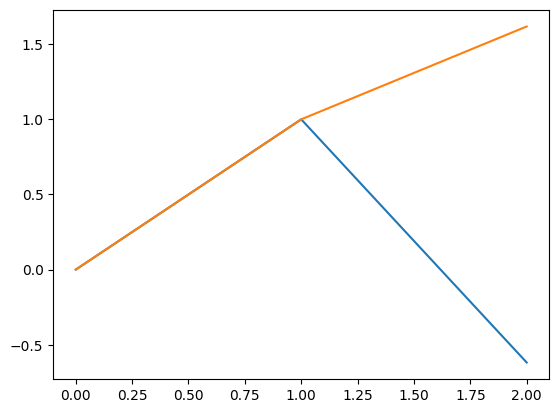

In [38]:
import numpy as np
y=np.array([6,7])
plot_and_freq(y,False)

[{'freq': 1.9418836348105106, 'vec': [1.0, -1.7708941189798788, 2.1360773634440706, -2.011905811920793, 1.4268453340262608, -0.514933415989655]}, {'freq': 1.7709120513241887, 'vec': [1.0, -1.1361124434348717, 0.2907579967660211, 0.8057752491584486, -1.20622922233488, 0.5646748999841583]}, {'freq': 1.4970214963663415, 'vec': [1.0, -0.24106086085974704, -0.9418921551466151, 0.46812589077587785, 0.8290407471109498, -0.6679961302765316]}, {'freq': 1.136129493471333, 'vec': [1.0, 0.7092135647378365, -0.4970223637196353, -1.0617135717062096, -0.25595334108341766, 0.8801944286807307]}, {'freq': 0.7092097740891682, 'vec': [1.0, 1.4970184405150244, 1.2410665769608378, 0.3608863119566082, -0.7008089178691892, -1.4100116853317868]}, {'freq': 0.24107336051068695, 'vec': [1.0, 1.9418833754050115, 2.7709111590946565, 3.4389033360818977, 3.907038857452626, 4.148111663758582]}]


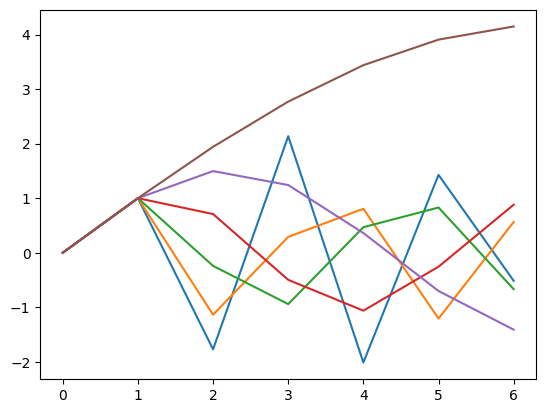

In [39]:
import numpy as np
y=np.array([2,1,1,2,3,4])
plot_and_freq(y,False)

[{'freq': 0.24107336051064623, 'vec': [1.0, 1.9418836855170059, 2.770912225937059, 3.438905483377511, 3.9070420730007798, 4.148115543125373]}, {'freq': 0.7092097740873757, 'vec': [1.0, 1.4970251337126828, 1.2410813914763827, 0.36089860099518667, -0.7008122562015187, -1.410030514298373]}, {'freq': 1.1361294934743744, 'vec': [1.0, 0.7092020410546767, -0.4970219320509301, -1.0616836029169348, -0.25593827655520807, 0.8801605006267635]}, {'freq': 1.4970214963985284, 'vec': [1.0, -0.24109833927326974, -0.941864848686308, 0.46815624940795697, 0.829000566596797, -0.6679841485969525]}, {'freq': 1.7709120516056536, 'vec': [1.0, -1.1361737353168895, 0.2908820665991417, 0.8056734784012971, -1.2062020142267316, 0.564679459133538]}, {'freq': 1.941883634226988, 'vec': [1.0, -1.7709755080241534, 2.1363139195672542, -2.012266948253585, 1.427182756357672, -0.5150717529575844]}]


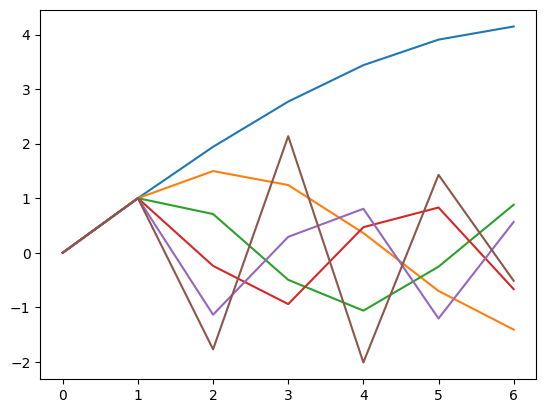

In [40]:
import numpy as np
y=np.array([2,1,1,2,3,4])
plot_and_freq(y,True)